## Problem Statement

#### To forcast the passenger inflow for next 12 months (for year 1961)

In [1]:
import pandas as pd

In [2]:
airpas=pd.read_csv('AirPassengers.csv')

In [3]:
airpas.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
airpas.shape

(144, 2)

In [5]:
airpas.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
airpas.rename(columns = {'#Passengers':'Passengers'}, inplace = True)

In [7]:
airpas.Month =pd.to_datetime(airpas.Month, infer_datetime_format=True)

In [8]:
airpas=airpas.set_index(['Month'])

In [9]:
airpas

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [10]:
airpas.shape

(144, 1)

In [11]:
import matplotlib.pyplot as plt

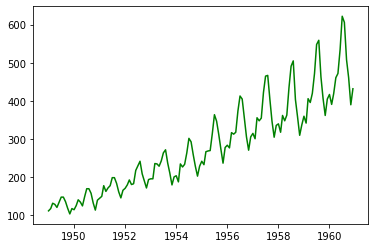

In [12]:
plt.plot(airpas,color='g');

In [13]:
airpas.diff()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


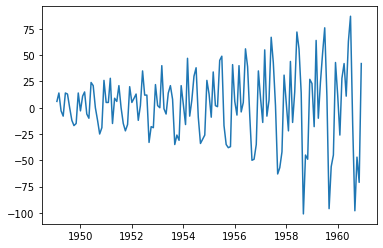

In [14]:
plt.plot(airpas.diff());
# In first level it not get stationary

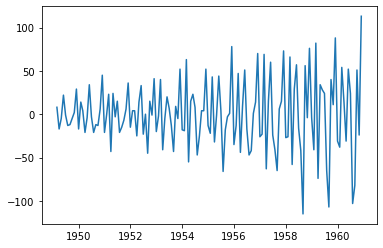

In [15]:
plt.plot(airpas.diff().diff());
# In second level it not get stationary

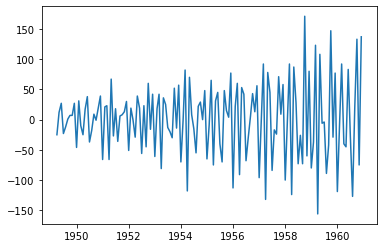

In [16]:
plt.plot(airpas.diff().diff().diff());
# In third level it not get station

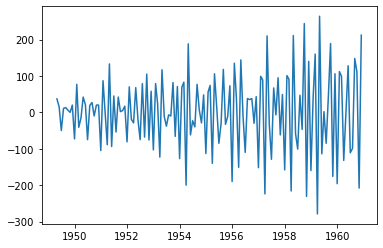

In [17]:
plt.plot(airpas.diff().diff().diff().diff());
# In fourth level it not get station

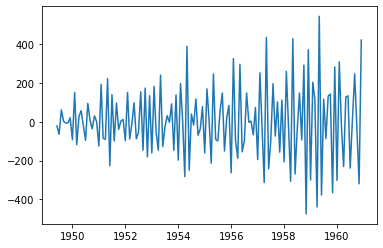

In [18]:
plt.plot(airpas.diff().diff().diff().diff().diff());
#In fifth level it not get station

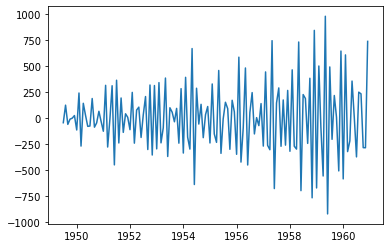

In [19]:
plt.plot(airpas.diff().diff().diff().diff().diff().diff());
#In sixth level it not get stationary

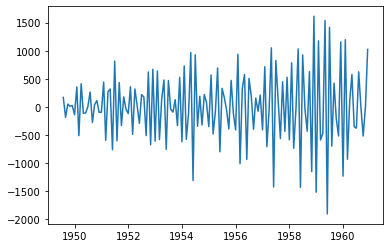

In [20]:
plt.plot(airpas.diff().diff().diff().diff().diff().diff().diff());
#

In [21]:
# Even after multiple multiple level of series doen not become stationary

In [22]:
import numpy as np

In [23]:
airpas_log= np.log(airpas)

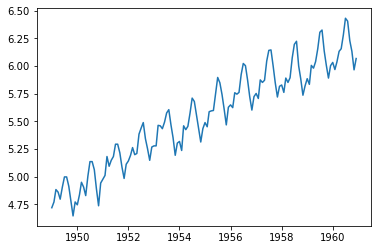

In [24]:
plt.plot(airpas_log)

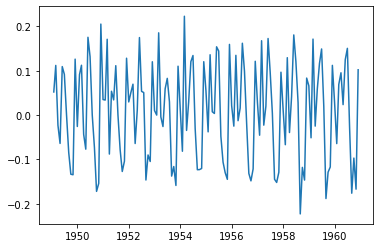

In [25]:
plt.plot(airpas_log.diff());

In [26]:
# so when we do forecast, forecasting would also be in log
# so we need to take anti log to get the data in same range (scale)

In [27]:
# To find the value of P and Q use ACF and PACF

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

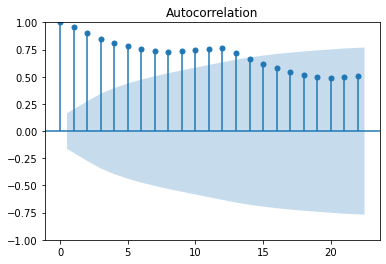

In [29]:
plot_acf(airpas_log.Passengers);

C:\Users\Vikalp Prajapati\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


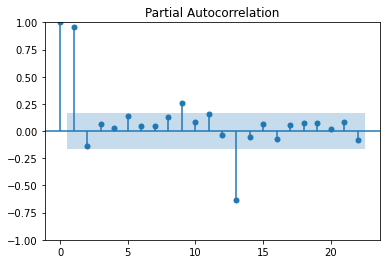

In [30]:
plot_pacf(airpas_log.Passengers);

In [32]:
# Problem associated with ARIMA (if can not Handel Seasonality)

In [33]:
# How to use sarima we will use autoarima (and what ever values we get from auto_ arima)
# just pass them in Sarima

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [35]:
result = seasonal_decompose(airpas_log)

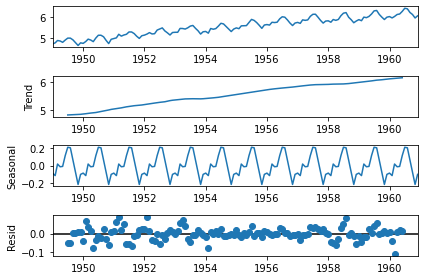

In [37]:
result.plot();
# this plot is get the idea of the data

In [38]:
auto_arima(airpas_log, seasonal=True, m=12) # m is the 12 months the data 

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [39]:
# That value we get from auto_arima pass them in SARIMA

In [41]:
model_sarima=SARIMAX(airpas_log, order=(2, 0, 0),seasonal_order=(0, 1, 1, 12))

C:\Users\Vikalp Prajapati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Vikalp Prajapati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
airpas_model= model_sarima.fit()

In [45]:
pred_values=airpas_model.predict(start=144, end=155,)
pred_values

1961-01-01    6.103666
1961-02-01    6.045537
1961-03-01    6.162150
1961-04-01    6.188396
1961-05-01    6.220306
1961-06-01    6.355151
1961-07-01    6.492347
1961-08-01    6.486609
1961-09-01    6.307048
1961-10-01    6.190059
1961-11-01    6.043207
1961-12-01    6.146433
Freq: MS, Name: predicted_mean, dtype: float64

In [46]:
pred_value1= np.exp(pred_values)

In [49]:
pred_value1.round()

1961-01-01    447.0
1961-02-01    422.0
1961-03-01    474.0
1961-04-01    487.0
1961-05-01    503.0
1961-06-01    575.0
1961-07-01    660.0
1961-08-01    656.0
1961-09-01    548.0
1961-10-01    488.0
1961-11-01    421.0
1961-12-01    467.0
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Month'>

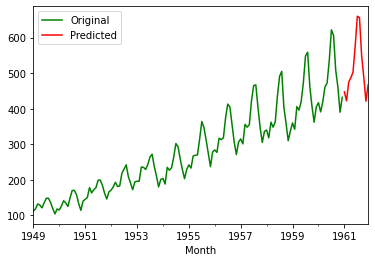

In [53]:
df=pd.DataFrame()
df['Predicted']= pred_value1
date_for_pred= ['1961-01-01','1961-02-01','1961-03-01','1961-04-01','1961-05-01',
               '1961-06-01','1961-07-01','1961-08-01','1961-09-01','1961-10-01',
               '1961-11-01','1961-12-01']
df['Month']= date_for_pred
df.Month=pd.to_datetime(df.Month, infer_datetime_format=True)
df=df.set_index(['Month'])
airpas['Passengers'].plot(legend=True, label= 'Original',color='green')
df['Predicted']. plot(legend=True, label= 'Predicted',color='red')